# Unsupervised Learning

Denetimsiz öğrenme, verilerden özellikleri veya desenleri öğrenmek için rehber olmadan kullanılan bir makine öğrenme yöntemidir.

-Elma, muz, portakal gibi farklı meyveleri içeren bir sepet düşünün. Denetimsiz öğrenme, bu meyveleri benzerlikleri üzerinden gruplayabilir. Örneğin, aynı tür meyveleri bir araya getirerek "meyve grupları" oluşturabilir.

In [1]:
import pandas as pd
dataset = pd.read_csv('Live.csv')
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


## K-Means Algoritması

1-Başlangıçta, K adet rastgele merkez nokta (centroid) seçilir.

2-Her veri noktası, en yakın merkeze atanır ve bu şekilde K kümesi oluşturulur.

3-Her kümenin merkezi, o küme içindeki veri noktalarının ortalaması alınarak güncellenir.

4-Yeni merkezler belirlendikten sonra, veriler tekrar merkezlere en yakın şekilde gruplanır.

5-Merkezlerin güncellenmesi ve verilerin yeniden gruplanması adımları tekrarlanır.

6-Merkezler artık çok fazla değişmediğinde veya belirli bir iterasyon sayısına ulaşıldığında algoritma sonlanır.

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3) # küme sayısı 3 e ayarlandı. 0 1 2 etiket

In [3]:
model.fit(dataset)

C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [4]:
labels = model.predict(dataset)

Her grupta kaç örnek var tespit ediliyor

In [5]:
import numpy as np
np.unique(labels,return_counts=True)# Dizideki benzersiz değerler döndürülüyor.

(array([0, 1, 2]), array([4288, 2334,  428], dtype=int64))

# #

Nasıl daha iyi sayıda küme seçebiliriz?

###### silhouette_score,

Veri noktalarının bir kümeleme algoritması tarafından ne kadar iyi gruplandığını değerlendirmek için kullanılan bir ölçüdür.

1-Pozitif bir skor, veri noktalarının doğru bir şekilde kümelenmiş olduğunu gösterir. Noktalar kendi küme üyeleriyle benzerdir ve diğer kümelerden farklıdır.

2-Sıfıra yakın bir skor, veri noktalarının çeşitli kümeler arasında sınıflandırıldığını veya net bir kümeleme yapmadığını gösterebilir.

3-Negatif bir skor, veri noktalarının yanlış kümelerde toplandığını veya yanlış sınıflandırıldığını gösterir.

In [17]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [18]:
silhouettes = []  # Boş bir liste oluşturuluyor, Silhouette skorlarını saklamak için kullanılacak.
ks =list(range(2,12)) # 2 ile 11 arasındaki küme sayılarını içeren bir liste oluşturuluyor.

dataset: Silhouette skoru hesaplamak için kullanılan veri kümesini temsil eden bir dizi veya matris. Bu, kümeleme sonuçlarını değerlendireceğiniz veri kümesidir.

label: Veri noktalarının hangi kümeye ait olduğunu belirten bir etiket dizisi veya matrisi. Bu, kümeleme sonucunun her veri noktası için atadığı küme etiketlerini içerir.

metric: Silhouette skoru hesaplanırken kullanılacak mesafe metriği. Varsayılan olarak 'euclidean' (Öklidyen mesafe) kullanılır, ancak farklı mesafe metrikleri de seçilebilir. 
Diğer olası seçenekler arasında 'manhattan' ve 'cosine' bulunur. Bu parametre, veri noktaları arasındaki benzerliği veya uzaklığı hesaplarken hangi ölçümün kullanılacağını belirtir.

In [11]:
for n_cluster in ks:# Her küme sayısı için işlemleri yapacak bir döngü başlatılıyor.
    kmeans=KMeans(n_clusters=n_cluster).fit(dataset)# K-Means kümeleme modeli oluşturuluyor ve veriye uyarlanıyor.
    label=kmeans.labels_# Her veri noktasının ait olduğu kümenin etiketleri alınıyor.
    sil_coeff = silhouette_score(dataset,label,metric='euclidean')# Silhouette skoru hesaplanıyor.
    print('For n_clustercs{}, The Silhoutte Coefficient is {}'.format(n_cluster,sil_coeff))
    silhouettes.append(sil_coeff)# Hesaplanan Silhouette skoru listeye ekleniyor.

C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs2, The Silhoutte Coefficient is 0.8188237721696822


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs3, The Silhoutte Coefficient is 0.8972493682244883


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs4, The Silhoutte Coefficient is 0.9106664962327088


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs5, The Silhoutte Coefficient is 0.8866768371183754


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs6, The Silhoutte Coefficient is 0.8430118288915796


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs7, The Silhoutte Coefficient is 0.8419421782294257


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs8, The Silhoutte Coefficient is 0.8369757672176514


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs9, The Silhoutte Coefficient is 0.7616669579609092


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs10, The Silhoutte Coefficient is 0.7260382520015509


C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clustercs11, The Silhoutte Coefficient is 0.6823213873415576


ValueError: x and y must be the same size

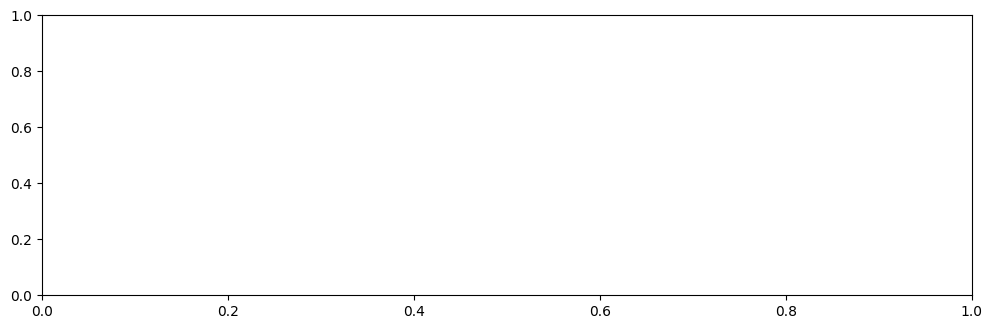

In [20]:
plt.figure(figsize =(12,8))
plt.subplot(211)
plt.scatter(ks,silhouettes,marker='x',c= 'r')
plt.plot(ks,silhouettes)
plt.xlabel('k')
plt.ylabel('Silhoutte score');

Text(0, 0.5, 'Silhouette score')

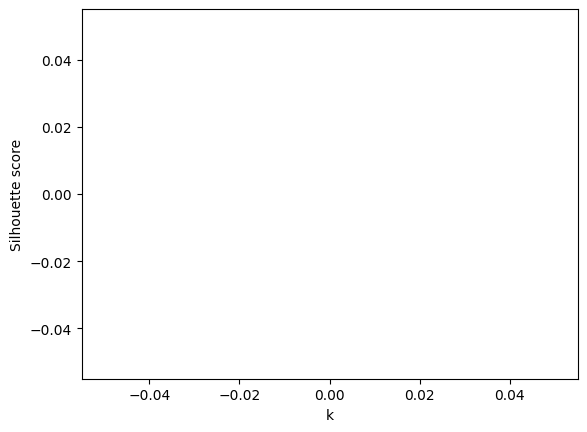

In [21]:
import numpy as np

# ks ve silhouettes dizilerini aynı uzunluğa getirin (örneğin ks dizisini kısaltın veya silhouettes dizisini uzatın)
if len(ks) > len(silhouettes):
    ks = ks[:len(silhouettes)]
elif len(ks) < len(silhouettes):
    silhouettes = silhouettes[:len(ks)]

# Daha sonra scatter ve plot işlemlerini gerçekleştirin
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')

In [22]:
#VERİLER DÖRT FARKLI GRUBA AYRILIR
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels,return_counts =True)

C:\Users\HafizeOgut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2, 3]), array([4288, 2334,  365,   63], dtype=int64))

Veri Çerçevemize etiketleri etiketleyelim ve görüntüleyelim
Gözlemlere frklı etiketler atama işlemi yapıldı.

In [24]:
dataset['labels'] = labels
dataset['labels'].value_counts()

labels
0    4288
1    2334
2     365
3      63
Name: count, dtype: int64

Her etiketin veri çerçevesindeki her bir etiketin kaç kez görüldüğünü bulunuyor.

Her bir değer kaç kez tektarlandı tespit edildi.

labels sütunu içinde etiketi "0" olan verilerin num_comments sütunundaki ortalama değer hesaplanır.



In [25]:
group_zero = dataset[dataset['labels'] == 0]['num_comments'].mean()
group_zero

0.0007619566531325948

Elde edilen 0.0007619566531325948 değeri, "Grup 0" olarak etiketlenen verilere ait olan num_comments sütununun ortalama değerini gösterir.

In [27]:
group_one = dataset[dataset['labels'] == 1]['num_comments'].mean()
group_one

0.030608773182480054

In [28]:
group_two = dataset[dataset['labels'] == 2]['num_comments'].mean()
group_two

0.0017264581307471548

In [30]:
group_three = dataset[dataset['labels'] == 3]['num_comments'].mean()
group_three

0.00027148226290672723